In [1]:
import sklearn

In [2]:
# Neural Network classification with Pytorch 

# 1. data preparation

from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                     noise=0.03, random_state=42)


In [3]:
len(X), len(y)

print(f'first 5 samples of X:\n {X[:5]}')
print(f'first 5 samples of y:\n {y[:5]}')

first 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y:
 [1 1 1 1 0]


In [4]:
X.shape, y.shape

((1000, 2), (1000,))

In [5]:
# Make data frame
import pandas as pd

circles = pd.DataFrame({'X1': X[:,0],
                        'X2': X[:,1],
                        'label': y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


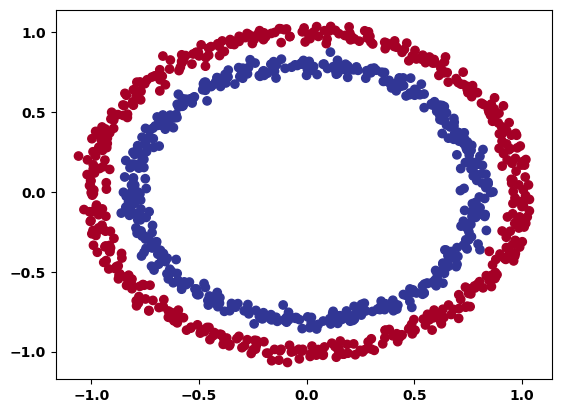

In [6]:
# Visualize, Visualize, Visualize
import matplotlib.pyplot as plt

plt.scatter(x= X[:,0], 
            y= X[:,1],
            c= y,
            cmap=plt.cm.RdYlBu)

In [7]:
# Check input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# view the first example of features and labels
X[0], y[0]
print(f'first example of features: {X[0]} and the same for y: {y[0]}')
print(f'Shapes for one sample of X: {X[0].shape} and y: {y[0].shape}')

first example of features: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and y: ()


In [9]:
# Turn the data into tensors
import torch

X = torch.from_numpy(X).type(torch.float)  # X = torch.tensor(X, dtype=torch.float32)  
y = torch.from_numpy(y).type(torch.float)


In [35]:
X.shape, y.shape, X[:5]
type(X), X.dtype

(torch.Tensor, torch.float32)

In [10]:

# splitting data : training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, # 0.2 = 20% test sample
                                                    random_state=42)

### Alternatively --> split the data manually

# split_data = int(len(X) * 0.8 )
# X_train, X_test = X[:split_data], X[split_data:]
# y_train, y_test = y[:split_data], y[split_data:]


len(X_train), len(X_test), len(y_train), len(y_test)


(800, 200, 800, 200)

### Building a model
 lets build a model to classify our blue and red dots
 1. setup device agnostic code
 2. construct a model 
 3. define a loss function and optimizer
 4. create a training loop and test loop

In [14]:
import torch 
import torch.nn as nn

# Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [15]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [ ]:
### 
# 1. subclasses `nn.Module` 
# 2. create 2 `nn.Linear` layers
# 3. define a `forward` method
# 4. define a `__init__` method -- instantiate of our model



In [17]:
# construct a model that subclasses `nn.Module`
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. create 2 `nn.Linear` layers
        self.layer_1 = nn.Linear(in_features=2, out_features=4) # takes in 2 features
        self.layer_2 = nn.Linear(in_features=4, out_features=1) # outputs 1 feature- same shape as y
    # 3.  define a forward method
    def forward(self, x):
        x = self.layer_1(x)
        x = self.layer_2(x)
        return x

# 4. instantiate the model and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=4, bias=True)
  (layer_2): Linear(in_features=4, out_features=1, bias=True)
)